In [46]:
# dự đoán điểm đọc dựa trên điểm viết
# feature: điểm viết
# target: điểm đọc

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('StudentsPerformance.csv')
df = pd.DataFrame({
    'writing score': data['writing score'],
    'reading score': data['reading score']
})

print(df.info())

df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   writing score  1000 non-null   int64
 1   reading score  1000 non-null   int64
dtypes: int64(2)
memory usage: 15.8 KB
None


,writing score,reading score
0,74,72
1,88,90
2,93,95
3,44,57
4,75,78
5,78,83
6,92,95
7,39,43
8,67,64
9,50,60


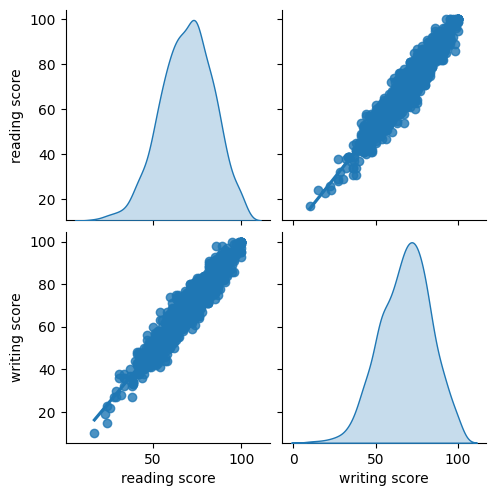

In [39]:
sns.pairplot(df[['reading score','writing score']], 
             diag_kind='kde', kind='reg')
plt.show()

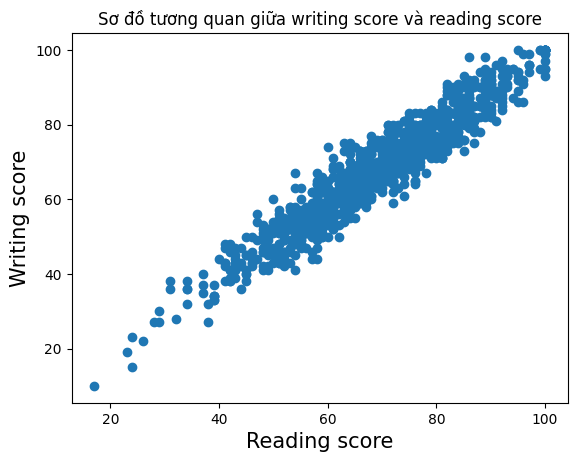

In [40]:
plt.scatter(df['reading score'], df['writing score'])
plt.xlabel('Reading score', fontsize=15)
plt.ylabel('Writing score', fontsize=15)
plt.title("Sơ đồ tương quan giữa writing score và reading score")
plt.show()

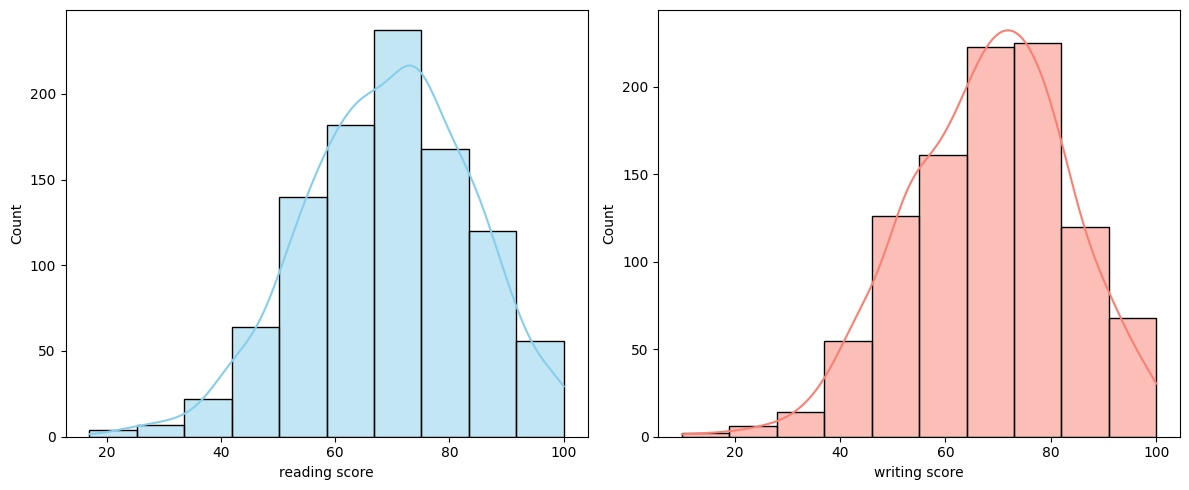

In [41]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(df['reading score'], bins=10, kde=True, color='skyblue', ax=axes[0])

sns.histplot(df['writing score'], bins=10, kde=True, color='salmon', ax=axes[1])

plt.tight_layout()
plt.show()

In [42]:
from sklearn.model_selection import train_test_split

X = df[['writing score']].values # feature
y= df[['reading score']].values # target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
from sklearn import linear_model 

model = linear_model.LinearRegression()

model.fit(X_train,y_train)

LinearRegression()

In [47]:
import numpy as np
from sklearn import metrics

y_test_pred = model.predict(X_test)

print('Score or R-Squared:', model.score(X_test, y_test))

print('Root Mean Squared Error:', 
      np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

# Dựa vào điểm R square cao cho thấy mô hình dự đoán khá chính xác.  RMSE thấp cho thấy kết quả dự đoán của mô hình có sai số chênh lệch với giá trị thực tế khoảng 4.72


Score or R-Squared: 0.901225573262185
Root Mean Squared Error: 4.727695994916526
